# XGBoost

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Files
from util import fetchOnlineData
from indicators import get_indicators

sns.set(font_scale = 1.5)

## Initial variables

In [2]:
symbol = "AABA"

# We'll look back 365 days
start_d = dt.date.today() - dt.timedelta(365)

## Importing dataset

In [9]:
yesterday = dt.date.today() - dt.timedelta(1)
portf_value = fetchOnlineData(start_d, symbol, yesterday, del_cols=True)

[*********************100%***********************]  1 of 1 downloaded


In [10]:
# Create dataset
dataset = portf_value.copy()
dataset['date'] = portf_value.index
dataset.set_index('date', inplace=True)
dataset.rename(columns={'Adj Close': symbol}, inplace=True)

## Introduce the Predictor variables

In [11]:
# Get indicators
sym_mom, sma, q, rsi_value = get_indicators(dataset, symbol)


# Create momentum column
dataset['Momentum'] = sym_mom

# Create SMA column
dataset['RSI'] = rsi_value

# Clean nan values
dataset = dataset.fillna(0)

# Sort dataframe by index
dataset.sort_index()

date
2018-02-28    0.049642
2018-03-01    0.001086
2018-03-02   -0.022984
2018-03-05   -0.000952
2018-03-06    0.007776
2018-03-07    0.011583
2018-03-08    0.002781
2018-03-09   -0.014660
2018-03-12   -0.006660
2018-03-13   -0.002102
2018-03-14    0.031396
2018-03-15    0.077027
2018-03-16    0.099188
2018-03-19    0.059913
2018-03-20    0.051882
2018-03-21    0.027507
2018-03-22   -0.015318
2018-03-23   -0.047246
2018-03-26   -0.022563
2018-03-27   -0.038700
2018-03-28   -0.059067
2018-03-29   -0.067741
2018-04-02   -0.103880
2018-04-03   -0.093911
2018-04-04   -0.120779
2018-04-05   -0.111310
2018-04-06   -0.094140
2018-04-09   -0.062466
2018-04-10   -0.066350
2018-04-11   -0.033959
                ...   
2018-12-31   -0.065635
2019-01-02   -0.043109
2019-01-03   -0.060724
2019-01-04    0.017678
2019-01-07    0.051666
2019-01-08    0.096855
2019-01-09    0.129779
2019-01-10    0.089983
2019-01-11    0.084699
2019-01-14    0.067524
2019-01-15    0.083535
2019-01-16    0.111324
2019-0

,AABA,Momentum,RSI
date,,,
2018-02-13,71.309998,0.000000,89.590648
2018-02-14,73.660004,0.000000,89.590648
2018-02-15,74.400002,0.000000,89.590648
2018-02-16,73.510002,0.000000,89.590648
2018-02-20,74.589996,0.000000,89.590648
2018-02-21,75.110001,0.000000,89.590648
2018-02-22,75.519997,0.000000,89.590648
2018-02-23,77.760002,0.000000,92.027478
2018-02-26,78.080002,0.000000,92.326858


In [ ]:
last_price =  normed.loc[normed.index[-1]][0]
last_price

In [ ]:
last_date = normed.loc[normed.index[-1]].name
last_date = last_date.strftime("%Y-%m-%d")

# Setup the Target variable or the desired output.

In [12]:
# Define X and y
feature_cols = ['Momentum', 'RSI']
X = dataset[feature_cols]
y = dataset[symbol]

## Create XGBoost DMaatrix structure

In [20]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

## Split the data

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

## Instantiate an XGBoost regressor object

In [21]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)


## Fit the regressor to the training set

In [22]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Make predictions on the test set

In [23]:
preds = xg_reg.predict(X_test)

## Compute the rmse

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 15.518996


## Plotting

In [27]:
predictions = pd.DataFrame({'Price': y_test, 'Price prediction': preds})

# Order dataframe
predictions.sort_index(inplace=True)

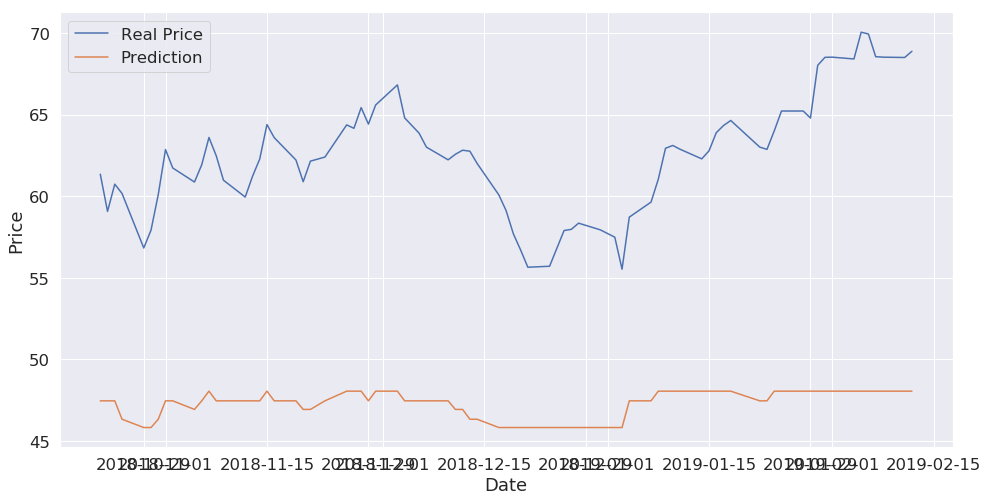

In [29]:
plt.figure(figsize=(16,8))
plt.plot(predictions)
plt.xlabel('Date')
plt.ylabel("Price")
plt.legend(["Real Price", "Prediction"])
plt.show()

# k-fold Cross Validation using XGBoost

## Create a hyper-parameter dictionary

We will create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary because you will use num_boost_rounds instead.

In [30]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}

We will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame. Note that here you are using the Dmatrix object you created before.

In [ ]:
cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=3,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

## cv_results contains train and test RMSE metrics for each boosting round.

In [32]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,62.351477,0.299544,62.351626,0.698801
1,56.229723,0.269192,56.229612,0.726973
2,50.724162,0.241781,50.723764,0.751832
3,45.774335,0.217018,45.773638,0.773605
4,41.325881,0.194635,41.324867,0.792489


## Extract and print the final boosting round metric.

In [33]:
print((cv_results["test-rmse-mean"]).tail(1))

49    6.021325
Name: test-rmse-mean, dtype: float64


You can see that your RMSE for the price prediction has reduced as compared to last time and came out to be around 6.02 per 1000$. 

You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters. 

## Instantiate an XGBoost regressor object

In [34]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[21:18:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:18:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:18:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:18:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:18:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:18:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:18:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:18:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:18:01] /workspace/sr

## Plotting the first tree

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

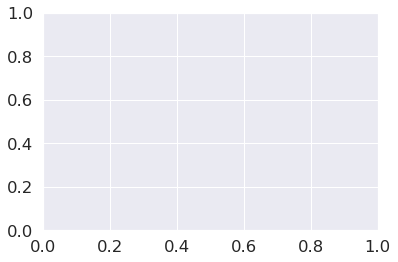

In [36]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [37]:
import os
print(os.environ['PATH'])

/home/emi/miniconda3/envs/factors/bin:/home/emi/miniconda3/envs/factors/bin:/home/emi/miniconda3py37/bin:/home/emi/miniconda3/bin:/home/emi//anaconda3/bin:/home/emi/anaconda3/bin:/home/emi/bin:/home/emi/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/home/emi/miniconda3/envs/factors/lib/python3.6/site-packages/xgboost/./lib
